In [4]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from dmdholo.fields_propagation.fourier_filter import fourier_filter
from dmdholo.holograms.dmd_holograms import parallel_lee,  orthogonal_lee, holo_SP, holo_Haskell
from dmdholo.holograms.generate_LUT import generate_lut

from dmdholo.plotting.plot_funs import colorize
from dmdholo.plotting.specialized_functions import plot_holoWzoom, plot_four, \
    add_linesNcircs, plot_amp_phase_proj

from piston_1 import DMDPiston

from waveoptics.plots.plots import complex_imshow

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(<Figure size 1500x500 with 2 Axes>, <Axes: >)

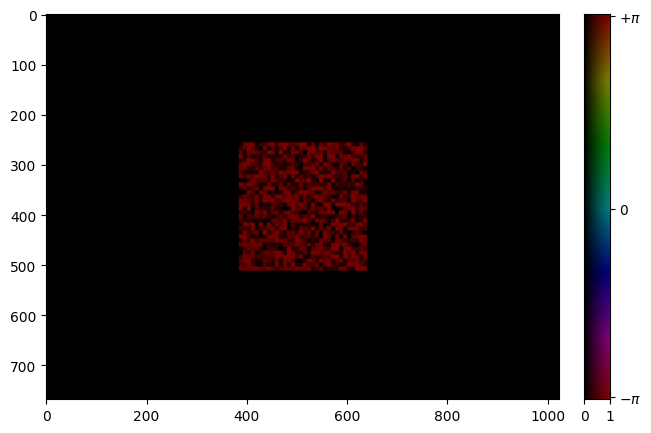

In [19]:
n = 32
dmd = DMDPiston(n_act_1d=n, roi_size=256)
dmd.generate_fields(n, rand_amp=True, rand_phi=False)
target_field = dmd.field_matrix

complex_imshow(target_field)

In [30]:
px = 4
nuvec = np.array((1/px,1/px**2)) 
SA_filter = 1.0*np.linalg.norm(nuvec)/6

In [31]:
f_val, px_comb, lut = generate_lut('sp', px)
holo = holo_SP(target_field, lut, px_comb)

In [32]:
shaped_field, ft_holo = fourier_filter(holo, nuvec, SA_filter, get_ft=True)
ft_holo_int = np.square(np.abs(ft_holo))
ft_holo_log = 10 * np.log10(ft_holo_int)

err_amp = np.abs(shaped_field) - np.abs(target_field)
err_amp_norm = np.abs(shaped_field) / np.max(np.abs(shaped_field)) - np.abs(target_field) / np.max(np.abs(target_field))
err_phi = np.angle(np.exp(1j * (np.angle(shaped_field) - np.angle(target_field))))

C:\Users\saucourt\AppData\Local\Temp\ipykernel_16860\350680592.py:3: RuntimeWarning: divide by zero encountered in log10
  ft_holo_log = 10 * np.log10(ft_holo_int)


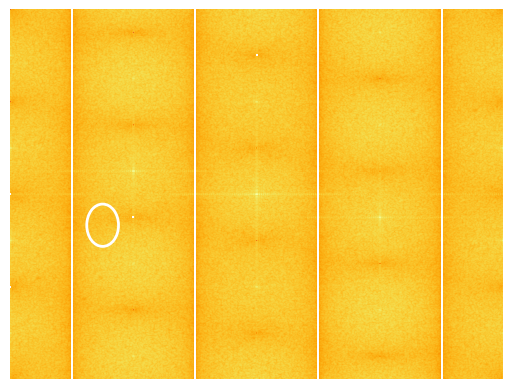

In [33]:
plot_four(ft_holo, log=True, ap_rad=SA_filter, ap_loc=nuvec)

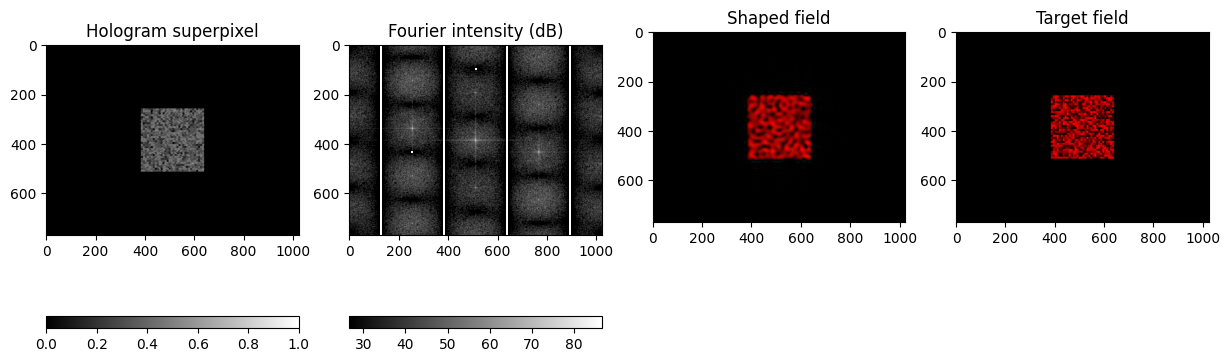

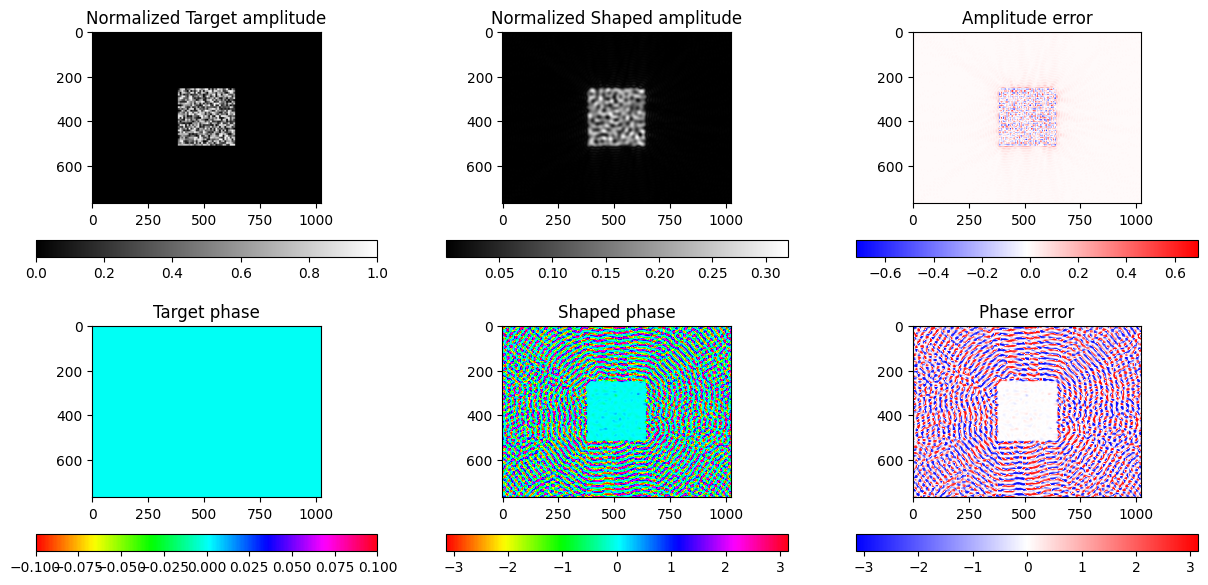

In [34]:
fig = plt.figure(figsize=(15, 7))

plt.subplot(1, 4, 1)
plt.imshow(holo, cmap='gray')
plt.title('Hologram superpixel')
plt.colorbar(location = 'bottom')

plt.subplot(1, 4, 2)
plt.imshow(ft_holo_log, cmap='gray', vmax=np.max(ft_holo_log), vmin=np.max(ft_holo_log)-60)
plt.title('Fourier intensity (dB)')
plt.colorbar(location = 'bottom')

plt.subplot(1, 4, 3)
plt.imshow(colorize(shaped_field))
plt.title('Shaped field')

plt.subplot(1, 4, 4)
plt.imshow(colorize(target_field))
plt.title('Target field')

plt.show()


fig = plt.figure(figsize=(15, 7))

plt.subplot(2, 3, 1)
plt.imshow(np.abs(target_field), cmap='gray')
plt.title('Normalized Target amplitude')
plt.colorbar(location = 'bottom')

plt.subplot(2, 3, 2)
plt.imshow(np.abs(shaped_field), cmap='gray')
plt.title('Normalized Shaped amplitude')
plt.colorbar(location = 'bottom')

plt.subplot(2, 3, 3)
plt.imshow(err_amp_norm, cmap='bwr')
plt.title('Amplitude error')
plt.colorbar(location = 'bottom')

plt.subplot(2, 3, 4)
plt.imshow(np.angle(target_field), cmap='hsv')
plt.title('Target phase')
plt.colorbar(location = 'bottom')

plt.subplot(2, 3, 5)
plt.imshow(np.angle(shaped_field), cmap='hsv')
plt.title('Shaped phase')
plt.colorbar(location = 'bottom')

plt.subplot(2, 3, 6)
plt.imshow(err_phi, cmap='bwr')
plt.title('Phase error')
plt.colorbar(location = 'bottom')


plt.show()